In [33]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch, random, subprocess, tempfile, json, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display
from tqdm import tqdm
from pathlib import Path
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from mmpose.registry import VISUALIZERS

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)


def create_table_image(
                            df,
                            figsize=(10, 3),
                            table_bbox=[0, 0, 1, 1],
                            table_colWidths=None,
                            table_loc="center",
                            fontsize=13,
                            tble_scale=(1, 2), # (x,y)
                            return_img=False
                        ):
    
    f = plt.figure(figsize=figsize)
    a = f.gca()
    a.axis("off")
    
    if table_colWidths is None:
        table_colWidths = [1 for _ in df.columns]
    
    table = a.table(
                        cellText=df.applymap(lambda x: f'{x:.4f}' if isinstance(x, float) else x).values, 
                        colLabels=df.columns,
                        loc=table_loc, 
                        bbox=table_bbox,
                        colWidths=table_colWidths
                    )
    
    if fontsize is not None:
        table.auto_set_font_size(False)
        table.set_fontsize(fontsize)
        
    table.scale(*tble_scale)
    
    f.tight_layout()
    f.show()
    
    if return_img:
        fig_img = utils.figure2ndarray(f)
        return fig_img
    else:
        return None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


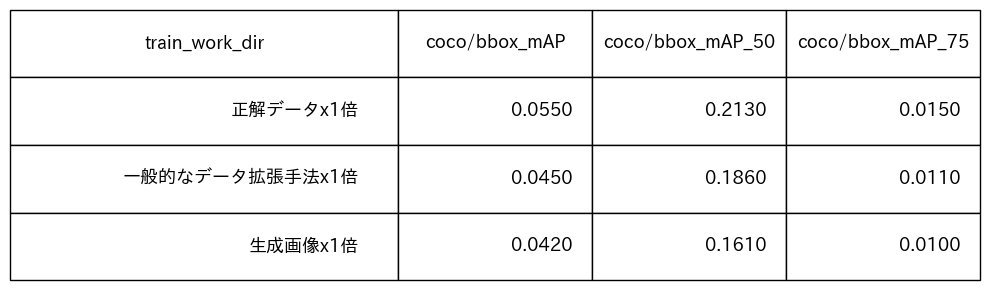

In [34]:
sample_dict = {
    "train_work_dir"   : ["正解データx1倍", "一般的なデータ拡張手法x1倍", "生成画像x1倍"],
    "coco/bbox_mAP"    : [0.0550, 0.0450, 0.0420],
    "coco/bbox_mAP_50" : [0.2130, 0.1860, 0.1610],
    "coco/bbox_mAP_75" : [0.0150, 0.0110, 0.0100],
    "coco/bbox_mAP_s"  : [0.0000, 0.0000, 0.0000],
    "coco/bbox_mAP_m"  : [0.0490, 0.0410, 0.0460],
    "coco/bbox_mAP_l"  : [0.0640, 0.0550, 0.0490],
}

sample_df = pd.DataFrame(sample_dict)


# sample_df = sample_df.applymap(lambda x: f'{x:.4f}' if isinstance(x, float) else x)

select_column = ['train_work_dir', 'coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75']
create_table_image(sample_df[select_column], table_colWidths=[2,1,1,1])